<a href="https://colab.research.google.com/github/aiswaryapaul/airbnb_data_analysis/blob/main/airbnb_casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/Airbnb_data.xls')

In [ ]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.sample(n=10) #for random rows

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48282,36177241,VJ'S 5 HOUR YACHT TOUR,23732730,Buddy,Bronx,City Island,40.84443,-73.78497,Entire home/apt,1000,1,0,NaN,NaN,4,90
9830,7561686,Cozy Large Studio - Yankee Stadium,39639929,John,Bronx,Concourse,40.82381,-73.92725,Entire home/apt,110,1,1,08-08-2015,0.02,1,0
378,113265,Brooklyn- Crown Heights Garden Apt.,314582,Anthony,Brooklyn,Crown Heights,40.67555,-73.95057,Private room,55,2,247,21-06-2019,2.51,2,275
10383,7952963,Gorgeous Pre War Sanctuary - 1 block from Unio...,3333577,Julia,Manhattan,Gramercy,40.73523,-73.98668,Private room,160,2,53,01-07-2019,1.16,2,344
38789,30393896,"Mod Tribeca Studio w/ Tons of light, Gym, Pool...",107434423,Blueground,Manhattan,Tribeca,40.71508,-74.00628,Entire home/apt,274,30,0,NaN,NaN,232,194
37762,29920153,2 bedroom in Astoria Queens 20 minutes to NYC,222421079,Maria,Queens,Long Island City,40.76150,-73.94323,Entire home/apt,455,2,0,NaN,NaN,1,83
40257,31220749,"Private bedroom near M train, 22 min to Manhat...",47931146,Rachel,Queens,Ridgewood,40.70393,-73.90851,Private room,39,6,2,03-04-2019,0.55,1,0
31183,24209867,Spacious Room in Clinton Hill/Bed-Stuy,1218837,Diana,Brooklyn,Bedford-Stuyvesant,40.68993,-73.95947,Private room,58,2,0,NaN,NaN,2,0
32637,25666271,private bedroom in the center of NYC action 21B4,190921808,John,Manhattan,Hell's Kitchen,40.75374,-73.99517,Private room,70,7,8,08-01-2019,0.73,47,310
35964,28574888,Guest Studio at Stella's place,15617507,Stella,Bronx,Morris Park,40.85105,-73.86049,Entire home/apt,60,2,20,19-05-2019,2.29,3,208


In [ ]:
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
df.drop(columns=['last_review'],inplace=True)

In [ ]:
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
df['reviews_per_month'].fillna(0,inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

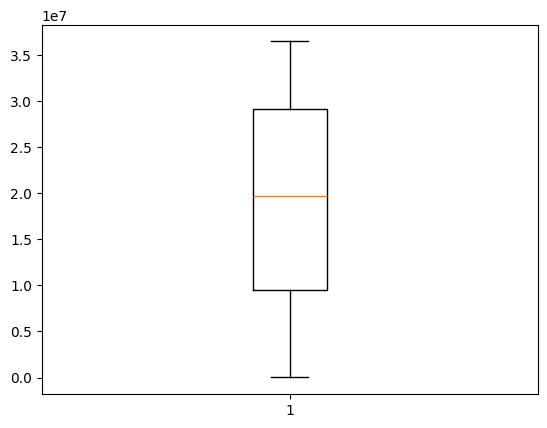

In [ ]:
#outlier
plt.boxplot(df['id'])
plt.show()

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,40.728941,-73.952170,152.740309,7.012444,23.273098,1.091124,7.148369,112.801425
std,1.098289e+07,7.862389e+07,0.054528,0.046159,240.232386,20.019757,44.549898,1.597270,32.964600,131.610962
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,40.763107,-73.936280,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


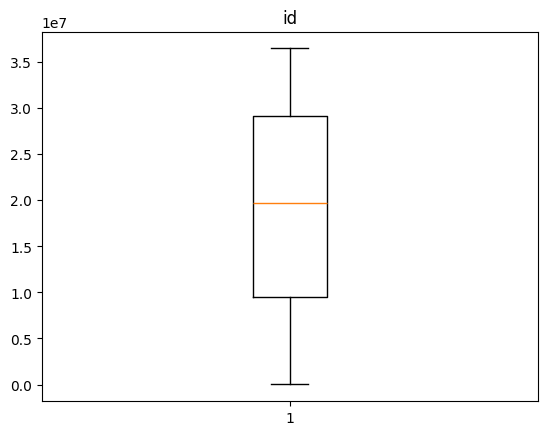

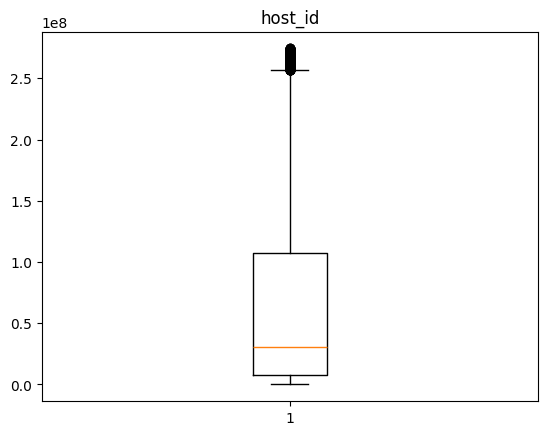

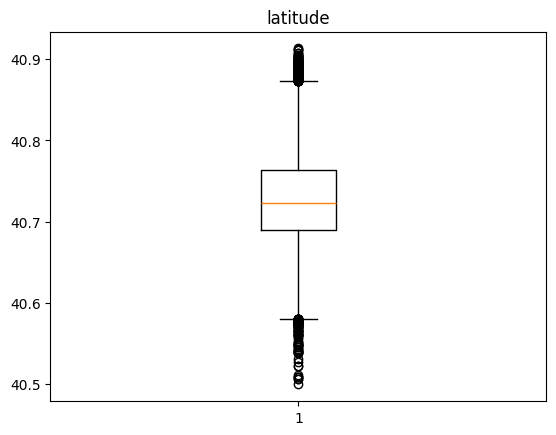

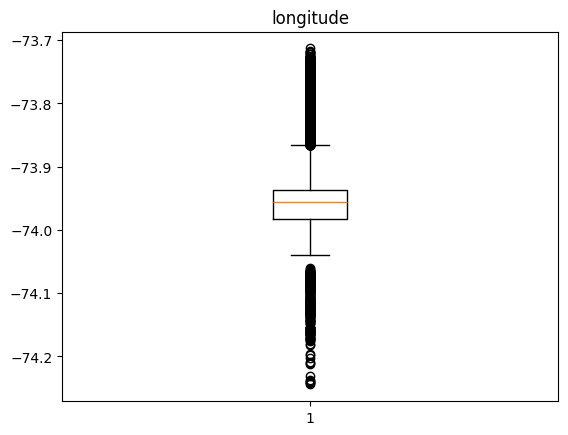

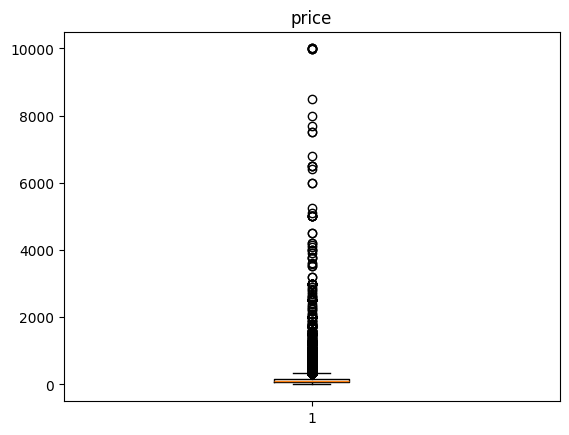

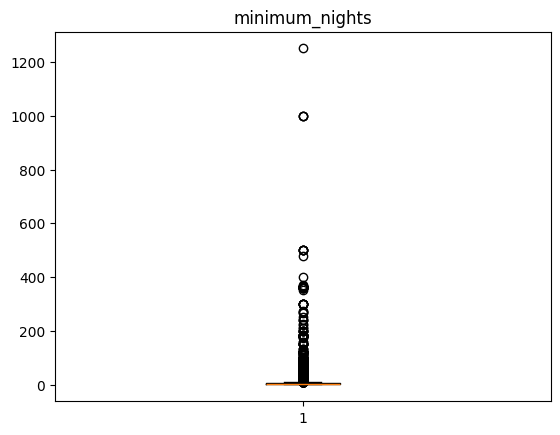

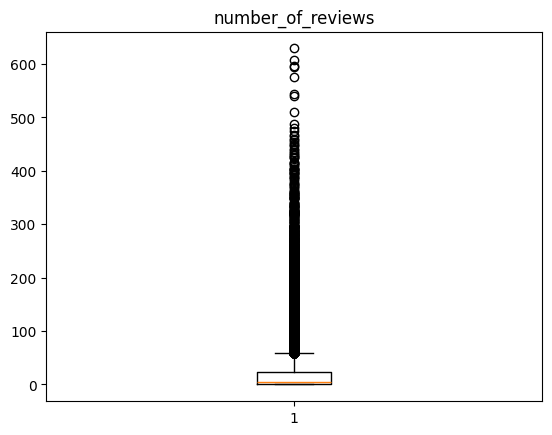

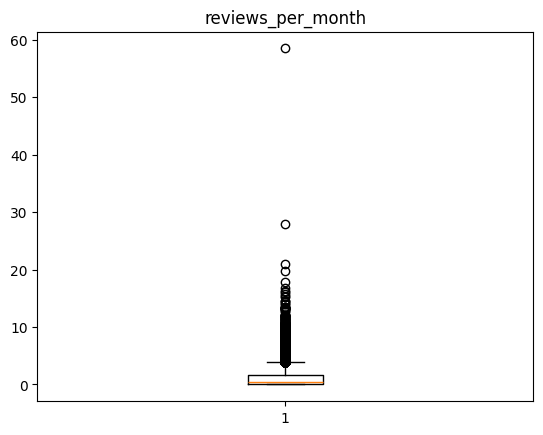

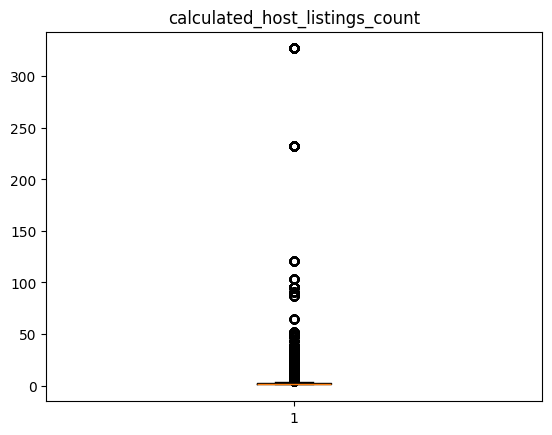

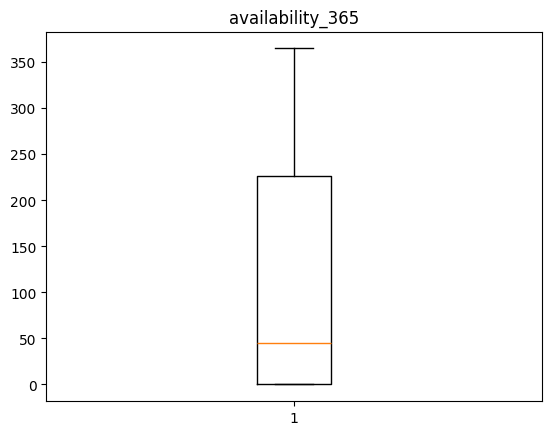

In [ ]:
for col in df.columns:
  if df[col].dtype != 'object': # Check if the column is numerical
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()


In [ ]:
Q1 = df['minimum_nights'].quantile(0.25)
Q3 = df['minimum_nights'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Filter and update df
df = df[(df['minimum_nights'] >= lower_bound) & (df['minimum_nights'] <= upper_bound)]

# Display the updated DataFrame
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
df['minimum_nights'].describe()

,minimum_nights
count,42253.000000
mean,2.704565
std,1.857352
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,11.000000


Q1.which neighbourhood is having the highest availability throughout the year?


In [ ]:
# Find the neighborhood with the highest average availability
highest_avail_neighbourhood = df.groupby('neighbourhood')['availability_365'].mean().idxmax()

# Display the result
print("Neighbourhood with the highest availability throughout the year:", highest_avail_neighbourhood)

# If you want the top 5 neighborhoods
top_5_neighbourhoods = df.groupby('neighbourhood')['availability_365'].mean().sort_values(ascending=False).head(5)
print(top_5_neighbourhoods)


Neighbourhood with the highest availability throughout the year: Fort Wadsworth
neighbourhood
Fort Wadsworth    365.000000
Co-op City        364.000000
Willowbrook       351.000000
Eastchester       333.461538
Richmondtown      300.000000
Name: availability_365, dtype: float64


plot this using a histogram

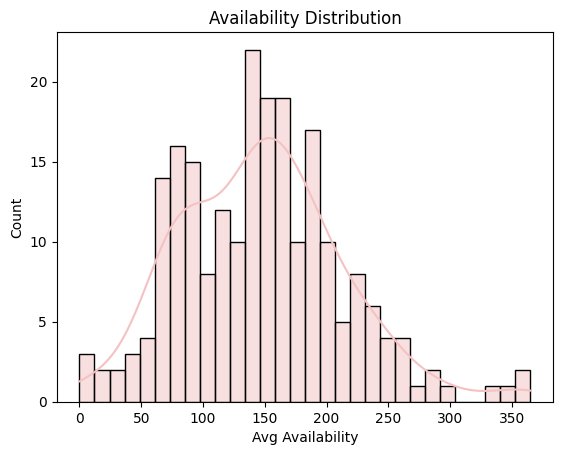

In [ ]:
sns.histplot(df.groupby('neighbourhood')['availability_365'].mean(), bins=30, kde=True, color="#F4C2C2")
plt.xlabel("Avg Availability"), plt.ylabel("Count"), plt.title("Availability Distribution")
plt.show()



Q2.calculate the average price of a particular room type and display it using bar plot


In [ ]:
room_avg_price = df.groupby('room_type')['price'].mean().sort_values(ascending=False).reset_index()

In [ ]:
room_avg_price


,room_type,price
0,Entire home/apt,210.260202
1,Private room,89.753835
2,Shared room,73.361744


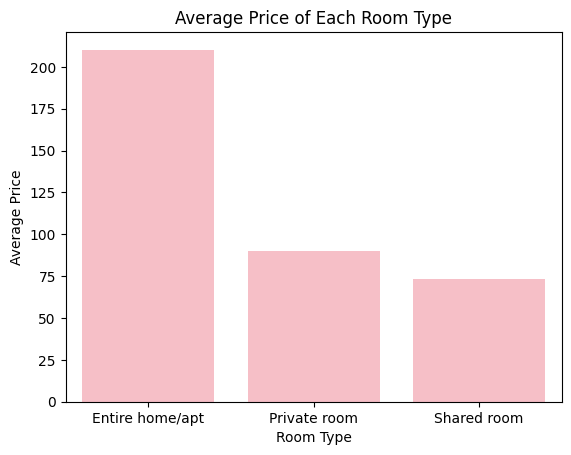

In [ ]:
room_avg_price = df.groupby('room_type')['price'].mean()

sns.barplot(x=room_avg_price.index, y=room_avg_price.values, color="#FFB6C1")
plt.title("Average Price of Each Room Type")
plt.xlabel("Room Type")
plt.ylabel("Average Price")
plt.show()

Q3.FIND the host id with most no. of listings